In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import re

from scipy import stats
from functools import reduce

%matplotlib inline

In [24]:
# ustawienie wyświetlania wszystkich kolumn i wczytanie danych
pd.set_option('display.max_columns', 40)
pd.set_option('float_format', '{:.3f}'.format)
data = pd.read_csv('ibm_hr_data.csv', low_memory=False)

In [25]:
# ustawienie czytelnej kolejności kolumn 
col_core = ['Gender', 'Age', 'MaritalStatus']
col_exp = ['Education', 'EducationField', 'NumCompaniesWorked', 'TotalWorkingYears']
col_job = ['Department', 'JobRole', 'JobLevel', 'JobInvolvement']
col_job_general = ['Employee Source', 'DistanceFromHome', 'DailyRate', 'BusinessTravel', 'Attrition']
col_years = ['YearsAtCompany', 'YearsSinceLastPromotion', 'YearsInCurrentRole', 'YearsWithCurrManager', ]
col_opinion = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']
col_more_money = ['MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TrainingTimesLastYear']
col_not_important = ['StandardHours', 'OverTime', 'Over18', 'HourlyRate']
col_weird = ['Application ID', 'EmployeeCount', 'EmployeeNumber']

new_col_order = col_core + col_exp + col_job + col_job_general + col_years + col_opinion + col_more_money + col_not_important + col_weird

set(data.columns) == set(new_col_order)

data = data[new_col_order]
data_befsize = data.shape
data.head()

,Gender,Age,MaritalStatus,Education,EducationField,NumCompaniesWorked,TotalWorkingYears,Department,JobRole,JobLevel,JobInvolvement,Employee Source,DistanceFromHome,DailyRate,BusinessTravel,Attrition,YearsAtCompany,YearsSinceLastPromotion,YearsInCurrentRole,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,StandardHours,OverTime,Over18,HourlyRate,Application ID,EmployeeCount,EmployeeNumber
0,Female,41.000,Single,2.000,Life Sciences,8.000,8.000,Sales,Sales Executive,2.000,3.000,Referral,1,1102.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,2.000,4,1.000,1.000,5993,19479.000,11,3.000,0.000,0.000,80.000,Yes,Y,94,123456,1,1
1,Female,37.000,Single,4.000,Human Resources,8.000,8.000,Human Resources,Sales Executive,2.000,3.000,Referral,6,807.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,1.000,4,1.000,1.000,5993,19479.000,11,4.000,0.000,0.000,80.000,Yes,Y,37,123457,1,1
2,Female,41.000,Single,2.000,Life Sciences,4.000,8.000,Sales,Sales Executive,2.000,3.000,Referral,1,1102.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,2.000,4,1.000,1.000,5993,19479.000,11,3.000,0.000,0.000,80.000,Yes,Y,94,123458,1,1
3,Female,37.000,Single,4.000,Marketing,5.000,8.000,Human Resources,Sales Executive,2.000,3.000,Referral,6,807.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,1.000,4,1.000,1.000,5993,19479.000,11,3.000,0.000,0.000,80.000,Yes,Y,37,123459,1,4
4,Female,37.000,Single,4.000,Human Resources,8.000,8.000,Human Resources,Sales Executive,2.000,3.000,Referral,6,807.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,1.000,4,1.000,1.000,5993,19479.000,11,3.000,0.000,0.000,80.000,Yes,Y,37,123460,1,5


In [26]:
# podsumowanie - ile cech w bazie zawiera puste komórki

summary = pd.DataFrame(data.dtypes, columns=['Data_Type'])
summary['Nulls'] = pd.DataFrame(data.isnull().any())
summary['Sum_of_Nulls'] = pd.DataFrame(data.isnull().sum())
summary['Per_of_Nulls'] = round((data.apply(pd.isnull).mean()*100),2)
summary.Data_Type = summary.Data_Type.astype(str)
print(summary)

                         Data_Type  Nulls  Sum_of_Nulls  Per_of_Nulls
Gender                      object   True            10         0.040
Age                        float64   True             3         0.010
MaritalStatus               object   True            11         0.050
Education                  float64   True            12         0.050
EducationField              object   True             9         0.040
NumCompaniesWorked         float64   True             9         0.040
TotalWorkingYears          float64   True             8         0.030
Department                  object   True            11         0.050
JobRole                     object   True             9         0.040
JobLevel                   float64   True             7         0.030
JobInvolvement             float64   True             9         0.040
Employee Source             object   True            12         0.050
DistanceFromHome            object   True             9         0.040
DailyRate           

In [27]:
# tablica duplikatów - wiersze różnią się pojedynczymi komórkami
# trzeba dokładnie sprawdzić do ilu elementów nie powtarzających się uznaje grupe wierszy za duplikaty

data[data.duplicated(keep=False)]

,Gender,Age,MaritalStatus,Education,EducationField,NumCompaniesWorked,TotalWorkingYears,Department,JobRole,JobLevel,JobInvolvement,Employee Source,DistanceFromHome,DailyRate,BusinessTravel,Attrition,YearsAtCompany,YearsSinceLastPromotion,YearsInCurrentRole,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,StandardHours,OverTime,Over18,HourlyRate,Application ID,EmployeeCount,EmployeeNumber
0,Female,41.000,Single,2.000,Life Sciences,8.000,8.000,Sales,Sales Executive,2.000,3.000,Referral,1,1102.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,2.000,4,1.000,1.000,5993,19479.000,11,3.000,0.000,0.000,80.000,Yes,Y,94,123456,1,1
1,Female,37.000,Single,4.000,Human Resources,8.000,8.000,Human Resources,Sales Executive,2.000,3.000,Referral,6,807.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,1.000,4,1.000,1.000,5993,19479.000,11,4.000,0.000,0.000,80.000,Yes,Y,37,123457,1,1
2,Female,41.000,Single,2.000,Life Sciences,4.000,8.000,Sales,Sales Executive,2.000,3.000,Referral,1,1102.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,2.000,4,1.000,1.000,5993,19479.000,11,3.000,0.000,0.000,80.000,Yes,Y,94,123458,1,1
3,Female,37.000,Single,4.000,Marketing,5.000,8.000,Human Resources,Sales Executive,2.000,3.000,Referral,6,807.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,1.000,4,1.000,1.000,5993,19479.000,11,3.000,0.000,0.000,80.000,Yes,Y,37,123459,1,4
4,Female,37.000,Single,4.000,Human Resources,8.000,8.000,Human Resources,Sales Executive,2.000,3.000,Referral,6,807.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,1.000,4,1.000,1.000,5993,19479.000,11,3.000,0.000,0.000,80.000,Yes,Y,37,123460,1,5
5,Female,37.000,Single,4.000,Marketing,5.000,8.000,Human Resources,Sales Executive,2.000,3.000,Referral,6,807.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,1.000,4,1.000,1.000,5993,19479.000,11,3.000,0.000,0.000,80.000,Yes,Y,37,123461,1,6
6,Female,41.000,Single,2.000,Life Sciences,8.000,8.000,Sales,Sales Executive,2.000,3.000,Referral,1,1102.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,2.000,4,1.000,1.000,5993,19479.000,11,3.000,0.000,0.000,80.000,Yes,Y,94,123462,1,7
56,Female,41.000,Single,2.000,Life Sciences,8.000,8.000,Sales,Sales Executive,2.000,3.000,Referral,1,1102.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,2.000,4,1.000,1.000,5993,19479.000,11,3.000,0.000,0.000,80.000,Yes,Y,94,123456,1,1
57,Female,37.000,Single,4.000,Human Resources,8.000,8.000,Human Resources,Sales Executive,2.000,3.000,Referral,6,807.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,1.000,4,1.000,1.000,5993,19479.000,11,4.000,0.000,0.000,80.000,Yes,Y,37,123457,1,1
58,Female,41.000,Single,2.000,Life Sciences,4.000,8.000,Sales,Sales Executive,2.000,3.000,Referral,1,1102.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,2.000,4,1.000,1.000,5993,19479.000,11,3.000,0.000,0.000,80.000,Yes,Y,94,123458,1,1


In [28]:
# szukanie kolumn z pustymi komórkami
data.isnull().sum()
data.isnull().sum().sum()

# sprawdzenie ile pustych komórek przypada na każdy wiersz
dd = data.isnull().sum(axis=1)
dd.sort_values(ascending=False)

# usunięcie wierszy z pustymi komórkami
# ich liczba jest tak mała, że nie zaszkodzi w dalszych badaniach
# usuwanie do 5%
data.dropna(axis=0, inplace=True)

# wyszukiwanie duplikatów tej samej informacji
# keep - czy zachować dane, np. first duplicate, last albo usunąć wszystkie
data[data.duplicated(keep=False)].shape

# 18 x 37 - można również usunąć
data.drop_duplicates(inplace=True)

# rozmiar końcowy do dalszych badań 
print(data.shape)

# różnica w rozmiarze
diff = data_befsize[0] - data.shape[0]
data_befsize[0] - data.shape[0]

# ile procent zostało usunięte
print(str(100 * diff/data_befsize[0]) + "% of whole dataset are duplicates and empty spaces!")

(23285, 37)
1.049634540200578% of whole dataset are duplicates and empty spaces!


In [29]:
data.columns

Index(['Gender', 'Age', 'MaritalStatus', 'Education', 'EducationField',
       'NumCompaniesWorked', 'TotalWorkingYears', 'Department', 'JobRole',
       'JobLevel', 'JobInvolvement', 'Employee Source', 'DistanceFromHome',
       'DailyRate', 'BusinessTravel', 'Attrition', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsInCurrentRole', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction',
       'RelationshipSatisfaction', 'WorkLifeBalance', 'MonthlyIncome',
       'MonthlyRate', 'PercentSalaryHike', 'PerformanceRating',
       'StockOptionLevel', 'TrainingTimesLastYear', 'StandardHours',
       'OverTime', 'Over18', 'HourlyRate', 'Application ID', 'EmployeeCount',
       'EmployeeNumber'],
      dtype='object')

In [30]:
# delete not needed columns
del_cols = ['EmployeeNumber', 'EmployeeCount', 'Application ID', 'Over18', 'StandardHours', 'StockOptionLevel']
data = data.drop(del_cols, axis=1)

# print all values for all columns ( to check if columns consists of only 1 value) 
# seems that NOO
for col in data.columns.tolist():
    data[col].value_counts()
    
# check types to be sure that everything seems right
data.dtypes

Gender                       object
Age                         float64
MaritalStatus                object
Education                   float64
EducationField               object
NumCompaniesWorked          float64
TotalWorkingYears           float64
Department                   object
JobRole                      object
JobLevel                    float64
JobInvolvement              float64
Employee Source              object
DistanceFromHome             object
DailyRate                   float64
BusinessTravel               object
Attrition                    object
YearsAtCompany              float64
YearsSinceLastPromotion     float64
YearsInCurrentRole          float64
YearsWithCurrManager        float64
EnvironmentSatisfaction     float64
JobSatisfaction              object
RelationshipSatisfaction    float64
WorkLifeBalance             float64
MonthlyIncome                object
MonthlyRate                 float64
PercentSalaryHike            object
PerformanceRating           

In [31]:
# not right - object type to columns, which are supposed to be float
checktype_cols = ['JobSatisfaction', 'HourlyRate', 'PercentSalaryHike', 'MonthlyIncome', 'DistanceFromHome']

print(data.JobSatisfaction.size)
print(data.JobSatisfaction.value_counts())
print(data.JobSatisfaction.value_counts().sum())

# suma się zgadza. Dlaczego type object?
data.JobSatisfaction.unique()

23285
4    7232
3    7043
1    4592
2    4418
Name: JobSatisfaction, dtype: int64
23285


array(['4', '3', '1', '2'], dtype=object)

In [32]:
data[checktype_cols] = data[checktype_cols].apply(np.float64)
data.dtypes

Gender                       object
Age                         float64
MaritalStatus                object
Education                   float64
EducationField               object
NumCompaniesWorked          float64
TotalWorkingYears           float64
Department                   object
JobRole                      object
JobLevel                    float64
JobInvolvement              float64
Employee Source              object
DistanceFromHome            float64
DailyRate                   float64
BusinessTravel               object
Attrition                    object
YearsAtCompany              float64
YearsSinceLastPromotion     float64
YearsInCurrentRole          float64
YearsWithCurrManager        float64
EnvironmentSatisfaction     float64
JobSatisfaction             float64
RelationshipSatisfaction    float64
WorkLifeBalance             float64
MonthlyIncome               float64
MonthlyRate                 float64
PercentSalaryHike           float64
PerformanceRating           

In [33]:
# to chyba nie jest rozkład normalny - lepiej zastosować inną korelację

data.describe()

# spróbować korelację rang Spearmana - może nasza baza również wykazuje skośność rozkładu

,Age,Education,NumCompaniesWorked,TotalWorkingYears,JobLevel,JobInvolvement,DistanceFromHome,DailyRate,YearsAtCompany,YearsSinceLastPromotion,YearsInCurrentRole,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TrainingTimesLastYear,HourlyRate
count,23285.000,23285.000,23285.000,23285.000,23285.000,23285.000,23285.000,23285.000,23285.000,23285.000,23285.000,23285.000,23285.000,23285.000,23285.000,23285.000,23285.000,23285.000,23285.000,23285.000,23285.000,23285.000
mean,36.901,2.910,2.691,11.273,2.065,2.729,9.216,802.573,7.012,2.179,4.229,4.125,2.721,2.726,2.712,2.761,6505.657,14324.660,15.213,3.155,2.798,65.844
std,9.109,1.024,2.499,7.779,1.106,0.711,8.100,403.219,6.132,3.212,3.626,3.573,1.095,1.102,1.081,0.706,4708.197,7106.166,3.665,0.362,1.289,20.342
min,18.000,1.000,0.000,0.000,1.000,1.000,1.000,102.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1009.000,2094.000,11.000,3.000,0.000,30.000
25%,30.000,2.000,1.000,6.000,1.000,2.000,2.000,465.000,3.000,0.000,2.000,2.000,2.000,2.000,2.000,2.000,2911.000,8053.000,12.000,3.000,2.000,48.000
50%,36.000,3.000,2.000,10.000,2.000,3.000,7.000,802.000,5.000,1.000,3.000,3.000,3.000,3.000,3.000,3.000,4936.000,14242.000,14.000,3.000,3.000,66.000
75%,43.000,4.000,4.000,15.000,3.000,3.000,14.000,1157.000,10.000,3.000,7.000,7.000,4.000,4.000,4.000,3.000,8380.000,20467.000,18.000,3.000,3.000,83.000
max,60.000,5.000,9.000,40.000,5.000,4.000,29.000,1499.000,40.000,15.000,18.000,17.000,4.000,4.000,4.000,4.000,19999.000,26999.000,25.000,4.000,6.000,100.000


In [34]:
# opis rozkładu danych typu object

data.select_dtypes(include = ['object']).describe()

,Gender,MaritalStatus,EducationField,Department,JobRole,Employee Source,BusinessTravel,Attrition,OverTime
count,23285,23285,23285,23285,23285,23285,23285,23285,23285
unique,2,3,7,3,9,10,3,3,2
top,Male,Married,Life Sciences,Research & Development,Sales Executive,Company Website,Travel_Rarely,Current employee,No
freq,13970,10654,9594,15188,5073,5383,16523,19527,16682


In [35]:
data.to_csv('clean_ibm_hr_data.csv',index=False)

# create copy for heatmap

data_copy = data.copy()
data_copy

,Gender,Age,MaritalStatus,Education,EducationField,NumCompaniesWorked,TotalWorkingYears,Department,JobRole,JobLevel,JobInvolvement,Employee Source,DistanceFromHome,DailyRate,BusinessTravel,Attrition,YearsAtCompany,YearsSinceLastPromotion,YearsInCurrentRole,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TrainingTimesLastYear,OverTime,HourlyRate
0,Female,41.000,Single,2.000,Life Sciences,8.000,8.000,Sales,Sales Executive,2.000,3.000,Referral,1.000,1102.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,2.000,4.000,1.000,1.000,5993.000,19479.000,11.000,3.000,0.000,Yes,94.000
1,Female,37.000,Single,4.000,Human Resources,8.000,8.000,Human Resources,Sales Executive,2.000,3.000,Referral,6.000,807.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,1.000,4.000,1.000,1.000,5993.000,19479.000,11.000,4.000,0.000,Yes,37.000
2,Female,41.000,Single,2.000,Life Sciences,4.000,8.000,Sales,Sales Executive,2.000,3.000,Referral,1.000,1102.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,2.000,4.000,1.000,1.000,5993.000,19479.000,11.000,3.000,0.000,Yes,94.000
3,Female,37.000,Single,4.000,Marketing,5.000,8.000,Human Resources,Sales Executive,2.000,3.000,Referral,6.000,807.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,1.000,4.000,1.000,1.000,5993.000,19479.000,11.000,3.000,0.000,Yes,37.000
4,Female,37.000,Single,4.000,Human Resources,8.000,8.000,Human Resources,Sales Executive,2.000,3.000,Referral,6.000,807.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,1.000,4.000,1.000,1.000,5993.000,19479.000,11.000,3.000,0.000,Yes,37.000
5,Female,37.000,Single,4.000,Marketing,5.000,8.000,Human Resources,Sales Executive,2.000,3.000,Referral,6.000,807.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,1.000,4.000,1.000,1.000,5993.000,19479.000,11.000,3.000,0.000,Yes,37.000
6,Female,41.000,Single,2.000,Life Sciences,8.000,8.000,Sales,Sales Executive,2.000,3.000,Referral,1.000,1102.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,2.000,4.000,1.000,1.000,5993.000,19479.000,11.000,3.000,0.000,Yes,94.000
7,Female,41.000,Single,2.000,Life Sciences,4.000,8.000,Sales,Sales Executive,2.000,3.000,Referral,1.000,1102.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,2.000,4.000,1.000,1.000,5993.000,19479.000,11.000,3.000,0.000,Yes,94.000
8,Female,41.000,Single,2.000,Life Sciences,8.000,8.000,Sales,Sales Executive,2.000,3.000,Referral,1.000,1102.000,Travel_Rarely,Voluntary Resignation,6.000,0.000,4.000,5.000,2.000,4.000,1.000,1.000,5993.000,19479.000,11.000,3.000,0.000,Yes,94.000
9,Female,41.000,Divorced,2.000,Life Sciences,2.000,21.000,Sales,Manager,4.000,3.000,Company Website,1.000,1102.000,Travel_Rarely,Voluntary Resignation,5.000,0.000,0.000,2.000,4.000,3.000,3.000,3.000,14756.000,19730.000,14.000,3.000,2.000,Yes,33.000


In [36]:
# now we are ready to start checking correlations between cols
# zamiana wszystkich object danych na numeryczne

object_data = data.select_dtypes(include=[np.object])
for col in object_data:
    print(col)
    print(data[col].unique())

gender = {'Female': 0, 'Male': 1}
marstatus = {'Single': 0, 'Married': 1, 'Divorced': 2}
edufield = {'Test': 0, 'Life Sciences': 1, 'Human Resources': 2, 'Marketing': 3, 'Technical Degree': 4, 'Medical': 5, 'Other': 6}
department = {'Sales': 0, 'Human Resources': 1, 'Research & Development': 2}
jobrole = {'Sales Executive': 0, 'Manager': 1, 'Human Resources': 2, 'Research Scientist': 3,
 'Manufacturing Director': 4, 'Laboratory Technician': 5,
 'Healthcare Representative': 6, 'Sales Representative': 7, 'Research Director': 8}
employeesrc = {'Referral': 1, 'Company Website': 2, 'Indeed': 3, 'Seek': 4, 'Adzuna': 5, 'Recruit.net': 6,
 'GlassDoor': 7, 'Jora': 8, 'LinkedIn': 9,'Test': 0}
busstravel = {'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}
attrition = {'Voluntary Resignation': 0, 'Current employee': 1, 'Termination': 0}
overtime = {'Yes': 1, 'No': 0}

# if its already changed, it won't work

data_copy['Gender']          = [gender[attr] for attr in data['Gender']]
data_copy['MaritalStatus']   = [marstatus[attr] for attr in data['MaritalStatus']]
data_copy['EducationField']  = [edufield[attr] for attr in data['EducationField']]
data_copy['Department']      = [department[attr] for attr in data['Department']]
data_copy['JobRole']         = [jobrole[attr] for attr in data['JobRole']]
data_copy['Employee Source'] = [employeesrc[attr] for attr in data['Employee Source']]
data_copy['BusinessTravel']  = [busstravel[attr] for attr in data['BusinessTravel']]
data_copy['Attrition']       = [attrition[attr] for attr in data['Attrition']]
data_copy['OverTime']        = [overtime[attr] for attr in data['OverTime']]

Gender
['Female' 'Male']
MaritalStatus
['Single' 'Divorced' 'Married']
EducationField
['Life Sciences' 'Human Resources' 'Marketing' 'Technical Degree' 'Other'
 'Medical' 'Test']
Department
['Sales' 'Human Resources' 'Research & Development']
JobRole
['Sales Executive' 'Manager' 'Human Resources' 'Research Scientist'
 'Manufacturing Director' 'Laboratory Technician'
 'Healthcare Representative' 'Sales Representative' 'Research Director']
Employee Source
['Referral' 'Company Website' 'Indeed' 'Seek' 'Adzuna' 'Recruit.net'
 'GlassDoor' 'Jora' 'LinkedIn' 'Test']
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Attrition
['Voluntary Resignation' 'Current employee' 'Termination']
OverTime
['Yes' 'No']


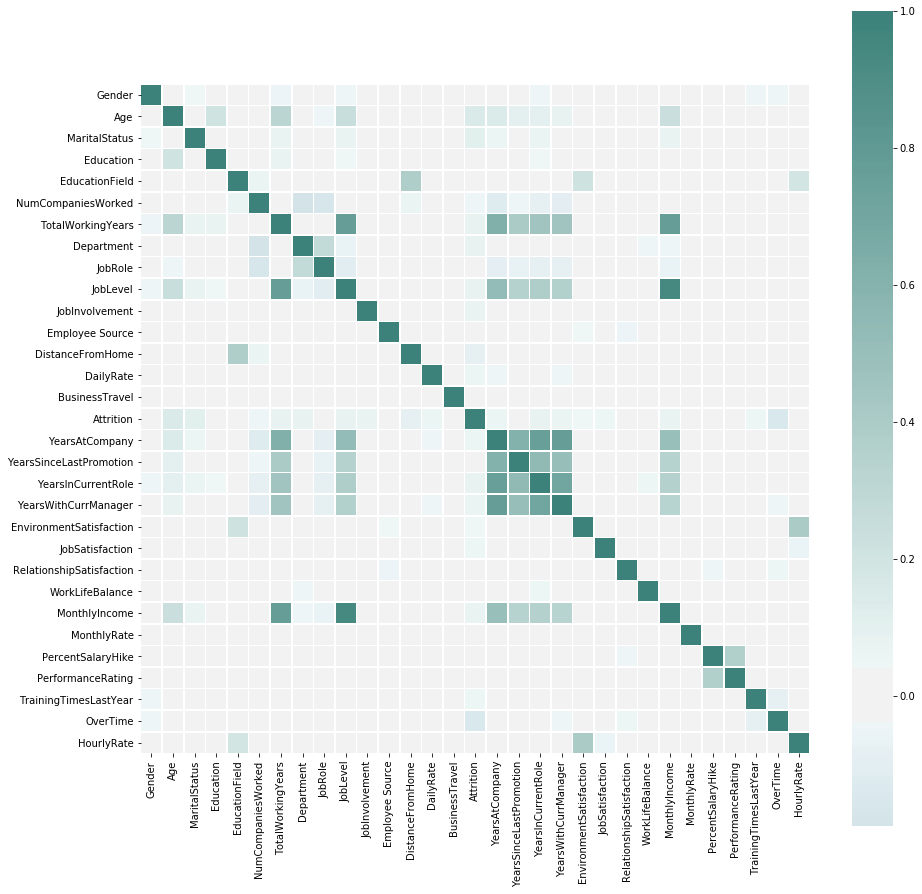

In [37]:
# wyszukuje te dane, które są wartościami liczbowymi
numeric_data = data_copy.select_dtypes(include=[np.number])

# obliczenie korelacji między wszystkimi wartościami numerycznymi
# wnioski np. mapy korelacji poszczególnych atrybutów

# korelacja Pearsona
corr_matrix = data_copy[numeric_data.columns].corr(method="pearson")

fig, ax = plt.subplots(figsize = (15,15))

cmap = sns.diverging_palette(220, 180, as_cmap=True)
# Generate a custom diverging colormap

sns.heatmap(corr_matrix, center=0.0, vmax=1, square=True, linewidths=.5, ax=ax, cmap=cmap)

Current employee         19527
Voluntary Resignation     3663
Termination                 95
Name: Attrition, dtype: int64

Current employee        0.839
Voluntary Resignation   0.157
Termination             0.004
Name: Attrition, dtype: float64


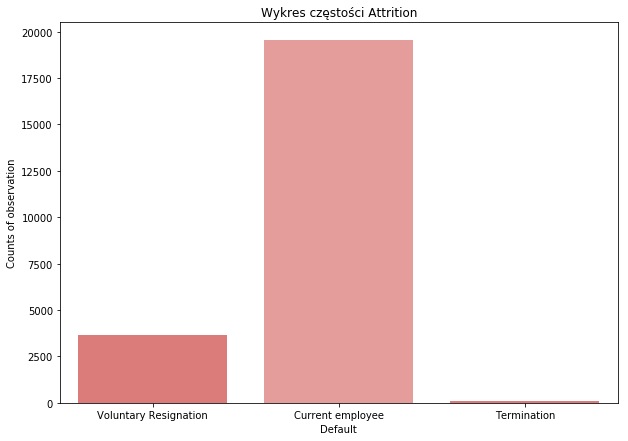

In [38]:
# ANALIZA ZMIENNEJ CELU

print(data['Attrition'].value_counts())
print()
print(data['Attrition'].value_counts(normalize = True))


plt.figure(figsize=(10,7))
sns.countplot(data['Attrition'], palette = ['#eb6c6a', '#f0918f']).set(title = 'Wykres częstości Attrition', xlabel = 'Default', ylabel = 'Counts of observation')
plt.show()

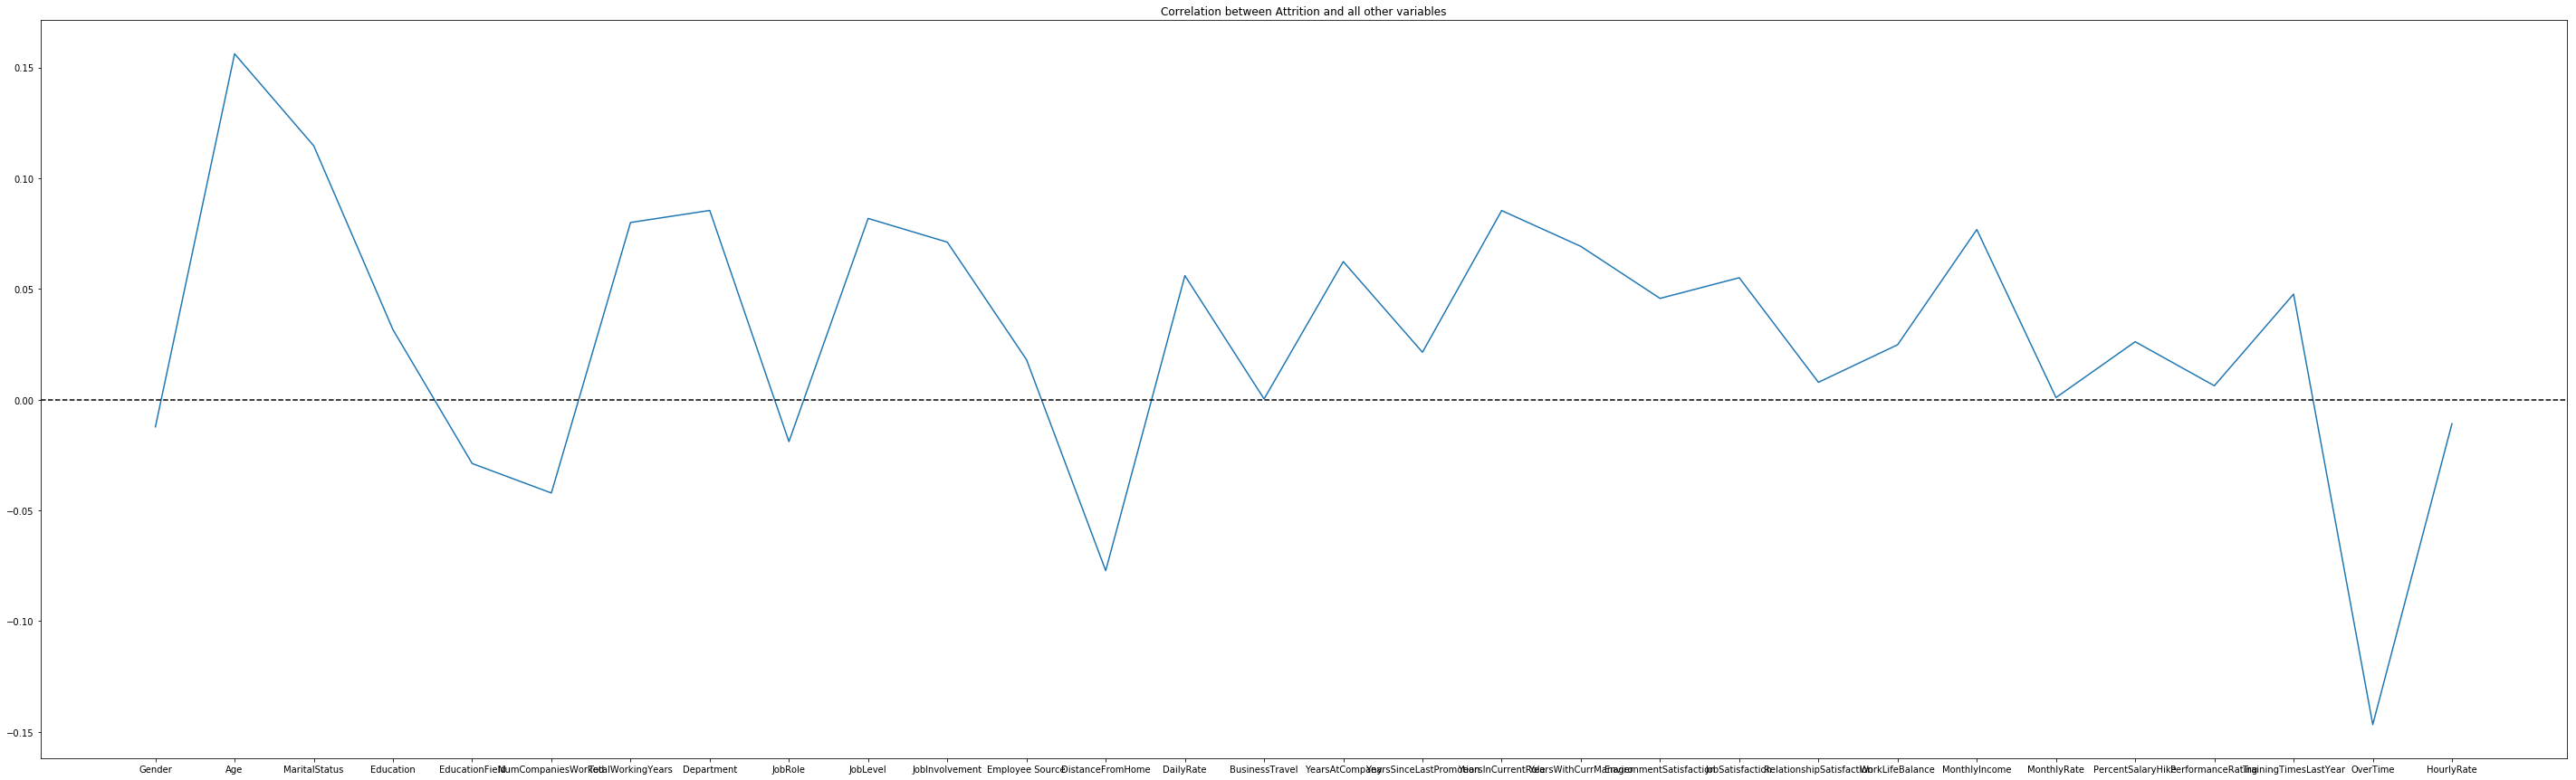

In [39]:
# korelacja dla Attrition

corr_matrix['Attrition']
# porównanie Attrition w departamentach

plt.figure(figsize=(50,15))
plt.title("Correlation between Attrition and all other variables")
plt.plot(corr_matrix['Attrition'].drop('Attrition'))
plt.axhline(0, color="k", linestyle="--");

In [40]:
# do zaobserwowania: AGE, OVERTIME, TOTALWORKINGYEARS, DEPARTMENT, YEARSINCURRENTROLE, JOBLEVEL
# największa korelacja: AGE, OVERTIME
# zamiana danych na tych co pracują i co odeszli - uogólnienie

data.Attrition = data.Attrition.replace('Termination', 'Voluntary Resignation')
data.Attrition = data.Attrition.replace('Voluntary Resignation', 'Former Employees')
data.Attrition = data.Attrition.replace('Current employee', 'Current Employees')

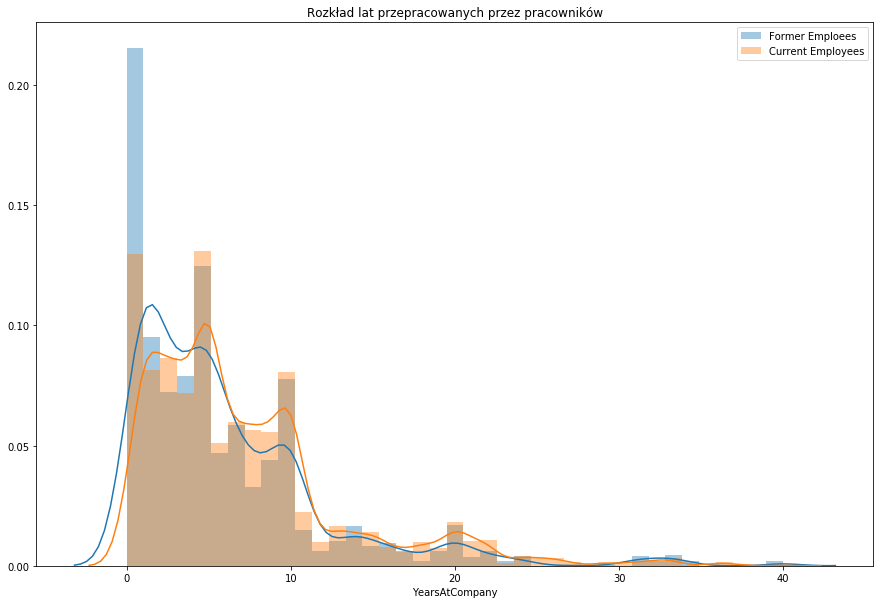

In [87]:
# Plot the distribution of Years at Company by Attrition


plt.figure(figsize=(15,10))
plt.title('Rozkład lat przepracowanych przez pracowników')
sns.distplot(data.YearsAtCompany[data.Attrition == 'Former Employees'], bins = np.linspace(0,40,40))
sns.distplot(data.YearsAtCompany[data.Attrition == 'Current Employees'], bins = np.linspace(0,40,40))
plt.legend(['Former Emploees','Current Employees'])

/home/ola/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


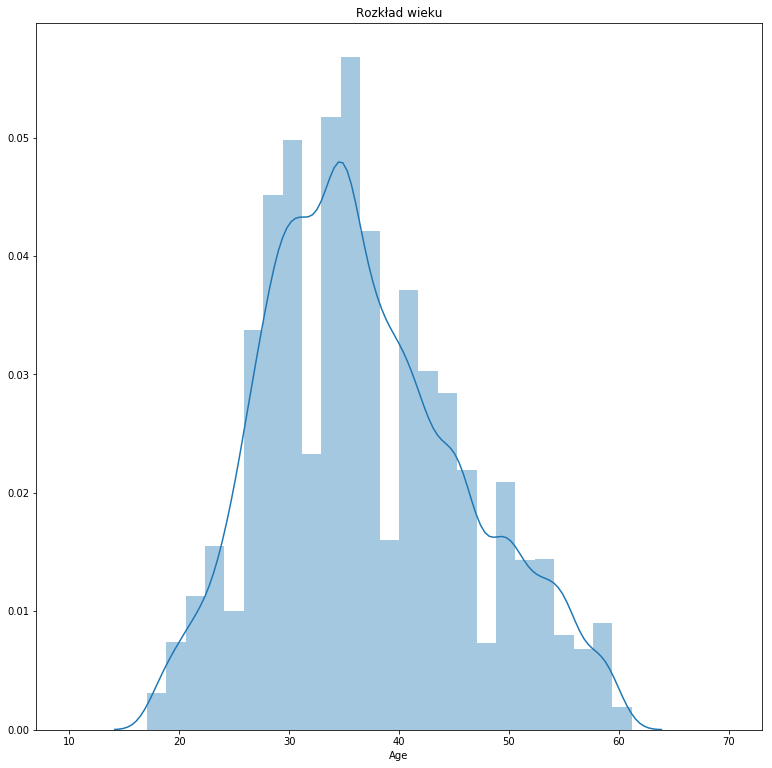

In [46]:
# ANALIZA ZMIENNYCH POWIĄZANYCH Z CELEM

# AGE 

plt.figure(figsize=(13,13))
plt.title('Rozkład wieku')
sns.distplot(data.Age, bins = np.linspace(10,70,35))

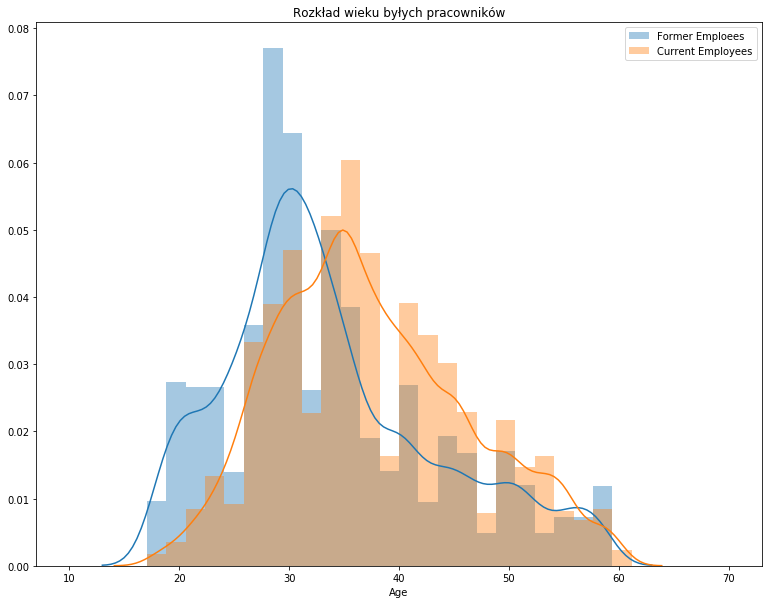

In [112]:
plt.figure(figsize=(13,10))
plt.title('Rozkład wieku byłych pracowników')
sns.distplot(data.Age[data.Attrition == 'Former Employees'], bins = np.linspace(10,70,35))
sns.distplot(data.Age[data.Attrition == 'Current Employees'], bins = np.linspace(10,70,35))
plt.legend(['Former Emploees','Current Employees'])

In [48]:
def count_percentage(data, name1, name2):
    datasum = data[name1].value_counts()
    xdata = {}
    for index in datasum.index:
        valuessum = dict(data[name2][data[name1] == index].value_counts().divide(datasum[index]/100))
        xdata[index] = valuessum
    mdata = {}
    for index in xdata:
        for name in xdata[index].keys():
            if name not in mdata.keys():
                mdata[name] = {}
            mdata[name][index] = xdata[index][name]
    return mdata

Ile procent pracowników odchodzi z danego sektora firmy
Sales: 20.682844243792324
HR: 18.63230921704658
RnD: 13.853041875164603


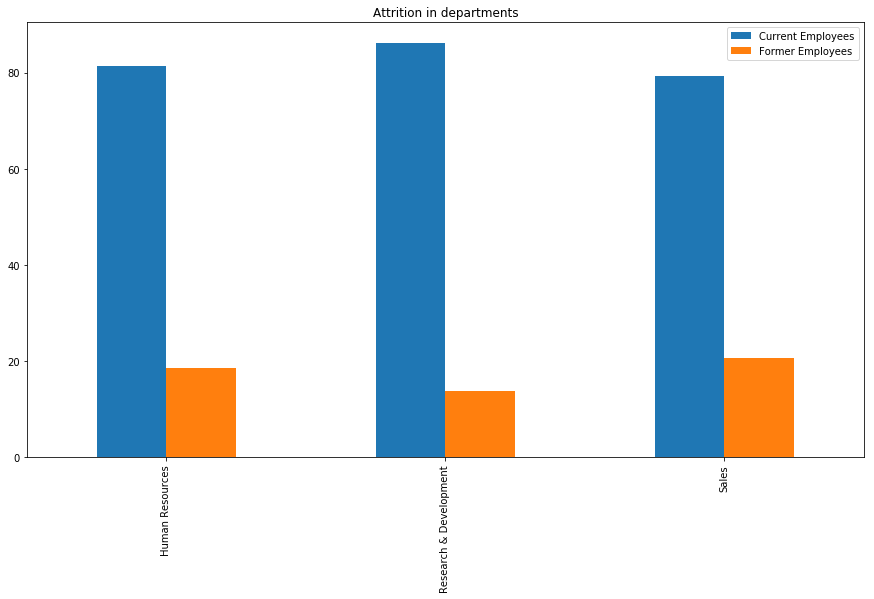

In [92]:
# porównanie Attrition w departamentach

# procentowe
# sales

print("Ile procent pracowników odchodzi z danego sektora firmy")
sales = data.Attrition[data.Department == 'Sales'].value_counts()
print("Sales: " + str(100 * sales['Former Employees'] / (sales.sum())))

# HR
hr = data.Attrition[data.Department == 'Human Resources'].value_counts()
print("HR: " + str(100 * hr['Former Employees'] / (hr.sum())))

# RnD
rnd = data.Attrition[data.Department == 'Research & Development'].value_counts()
print("RnD: " + str(100 * rnd['Former Employees'] / (rnd.sum())))

# na wykresie
pd.DataFrame(count_percentage(data, 'Department', 'Attrition')).plot(title='Attrition in departments',figsize=(15,8), kind='bar')

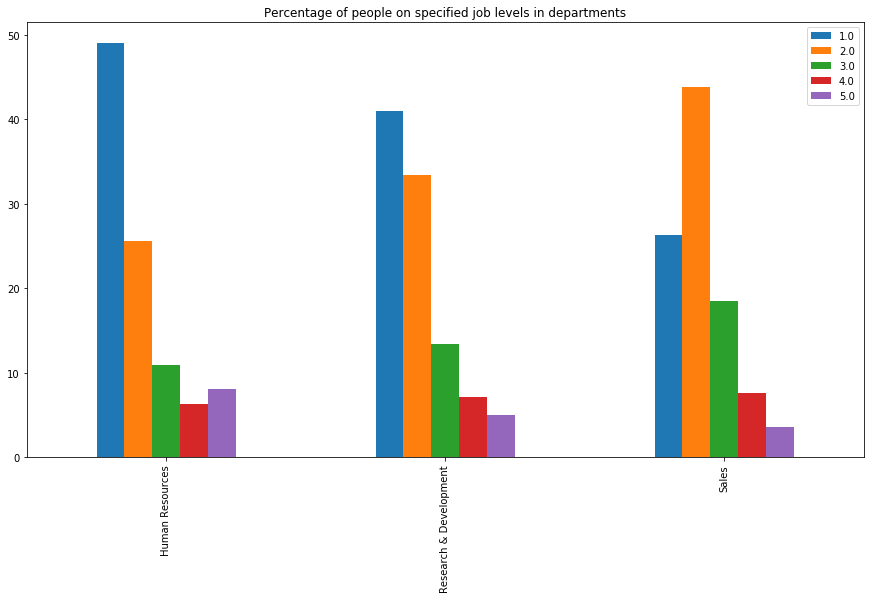

In [93]:
# ilość szczebli w danym sektorze
# wykres

pd.DataFrame(count_percentage(data, 'Department', 'JobLevel')).plot(title='Percentage of people on specified job levels in departments',figsize=(15,8), kind='bar')

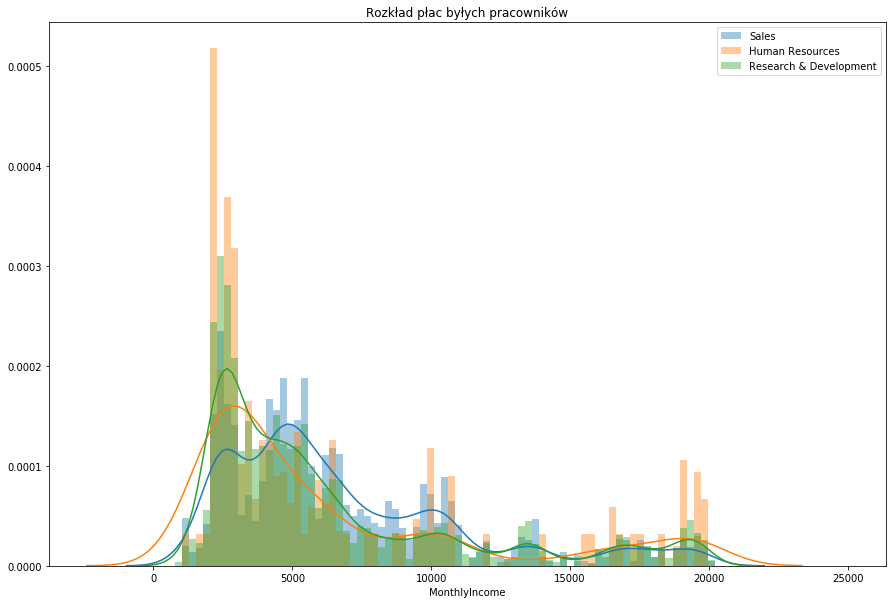

In [114]:
plt.figure(figsize=(15,10))
plt.title('Rozkład płac byłych pracowników')
sns.distplot(data.MonthlyIncome[data.Department == 'Sales'], bins = np.linspace(10,25000,100))
sns.distplot(data.MonthlyIncome[data.Department == 'Human Resources'], bins = np.linspace(10,25000,100))
sns.distplot(data.MonthlyIncome[data.Department == 'Research & Development'], bins = np.linspace(10,25000,100))
plt.legend(['Sales','Human Resources', 'Research & Development'])

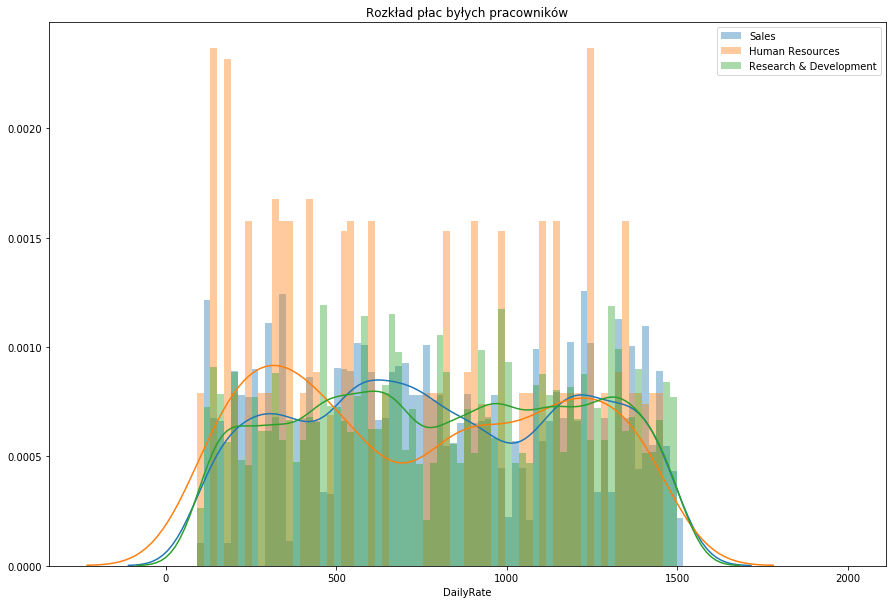

In [117]:
plt.figure(figsize=(15,10))
plt.title('Rozkład płac byłych pracowników')
sns.distplot(data.DailyRate[data.Department == 'Sales'], bins = np.linspace(10,2000,100))
sns.distplot(data.DailyRate[data.Department == 'Human Resources'], bins = np.linspace(10,2000,100))
sns.distplot(data.DailyRate[data.Department == 'Research & Development'], bins = np.linspace(10,2000,100))
plt.legend(['Sales','Human Resources', 'Research & Development'])

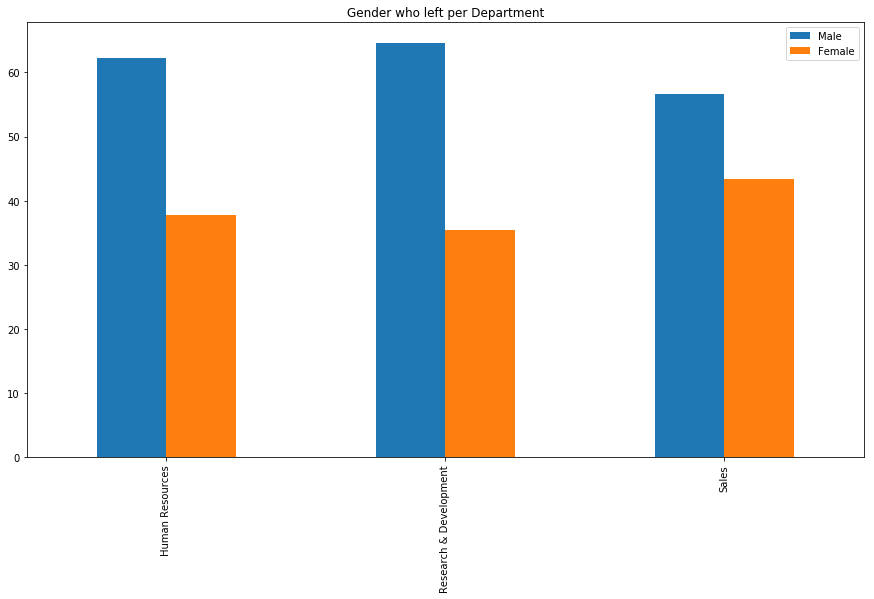

In [118]:
pd.DataFrame(count_percentage(data[data['Attrition'] == 'Former Employees'], 'Department', 'Gender')).plot(title='Gender who left per Department',figsize=(15,8), kind='bar')

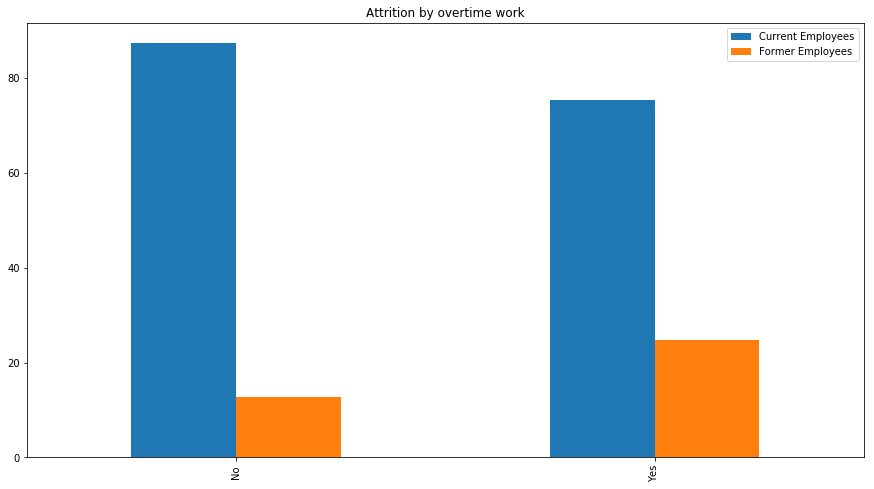

In [94]:
# attrition w zależnosci od nadgodzin


pd.DataFrame(count_percentage(data, 'OverTime', 'Attrition')).plot(title='Attrition by overtime work',figsize=(15,8), kind='bar')

# Given this assoication and that of age: perhaps over worked employees are more likely to be under 30?

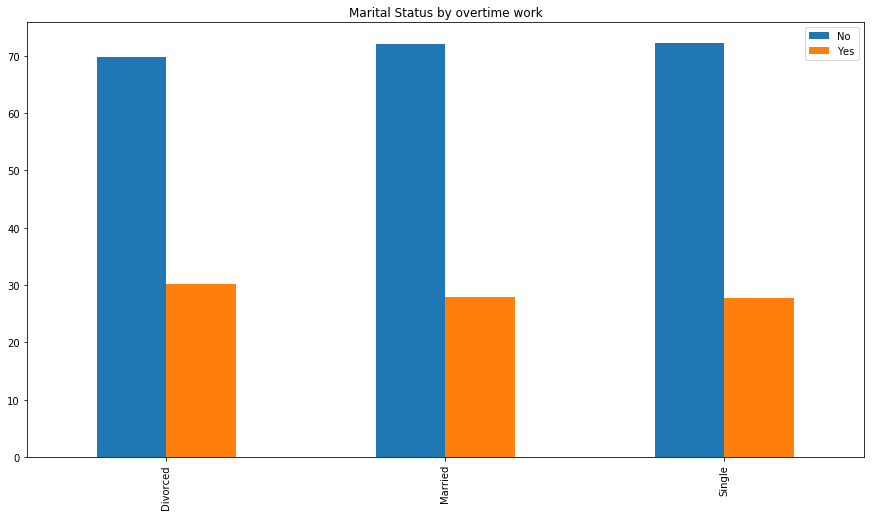

In [95]:
# check one more thing - Marital Status

pd.DataFrame(count_percentage(data, 'MaritalStatus', 'OverTime')).plot(title='Marital Status by overtime work',figsize=(15,8), kind='bar')

In [56]:
####################################################################

# classification


data.Attrition.value_counts()

Current Employees    19527
Former Employees      3758
Name: Attrition, dtype: int64

In [57]:
data_copy.Attrition.value_counts()
data_copy.dtypes
data_copy.head()

,Gender,Age,MaritalStatus,Education,EducationField,NumCompaniesWorked,TotalWorkingYears,Department,JobRole,JobLevel,JobInvolvement,Employee Source,DistanceFromHome,DailyRate,BusinessTravel,Attrition,YearsAtCompany,YearsSinceLastPromotion,YearsInCurrentRole,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TrainingTimesLastYear,OverTime,HourlyRate
0,0,41.000,0,2.000,1,8.000,8.000,0,0,2.000,3.000,1,1.000,1102.000,0,0,6.000,0.000,4.000,5.000,2.000,4.000,1.000,1.000,5993.000,19479.000,11.000,3.000,0.000,1,94.000
1,0,37.000,0,4.000,2,8.000,8.000,1,0,2.000,3.000,1,6.000,807.000,0,0,6.000,0.000,4.000,5.000,1.000,4.000,1.000,1.000,5993.000,19479.000,11.000,4.000,0.000,1,37.000
2,0,41.000,0,2.000,1,4.000,8.000,0,0,2.000,3.000,1,1.000,1102.000,0,0,6.000,0.000,4.000,5.000,2.000,4.000,1.000,1.000,5993.000,19479.000,11.000,3.000,0.000,1,94.000
3,0,37.000,0,4.000,3,5.000,8.000,1,0,2.000,3.000,1,6.000,807.000,0,0,6.000,0.000,4.000,5.000,1.000,4.000,1.000,1.000,5993.000,19479.000,11.000,3.000,0.000,1,37.000
4,0,37.000,0,4.000,2,8.000,8.000,1,0,2.000,3.000,1,6.000,807.000,0,0,6.000,0.000,4.000,5.000,1.000,4.000,1.000,1.000,5993.000,19479.000,11.000,3.000,0.000,1,37.000


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn_pandas import DataFrameMapper, gen_features, cross_val_score

In [59]:
# metoda 1
# random forest classifier

data_mod1 = data_copy.copy()
data_mod1 = data_mod1.sort_values('Attrition', ascending=False)

In [60]:
from math import floor
testsize = floor(0.2*data_mod1.shape[0])
data_test = data_mod1[:testsize + 1].copy()
data_pract = data_mod1[testsize+1:].copy()

In [61]:
rf = RandomForestClassifier(class_weight="balanced", n_estimators=500) 

In [62]:
rf.fit(data_pract.drop('Attrition',axis=1), data_pract.Attrition)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [63]:
# część uczenia się

dats = rf.predict(data_pract.drop('Attrition',axis=1))
dats

array([1, 1, 1, ..., 0, 0, 0])

In [64]:
# sprawdzenie 

rf.score(data_pract.drop('Attrition',axis=1), data_pract.Attrition)

1.0

In [65]:
# część testowa

rf.score(data_test.drop('Attrition', axis=1), data_test.Attrition)

0.963288965221125

In [66]:
test = rf.predict(data_test.drop('Attrition', axis=1))

In [67]:
importances = rf.feature_importances_

In [68]:
names = data_pract.columns

In [69]:
importances, names = zip(*sorted(zip(importances, names)))

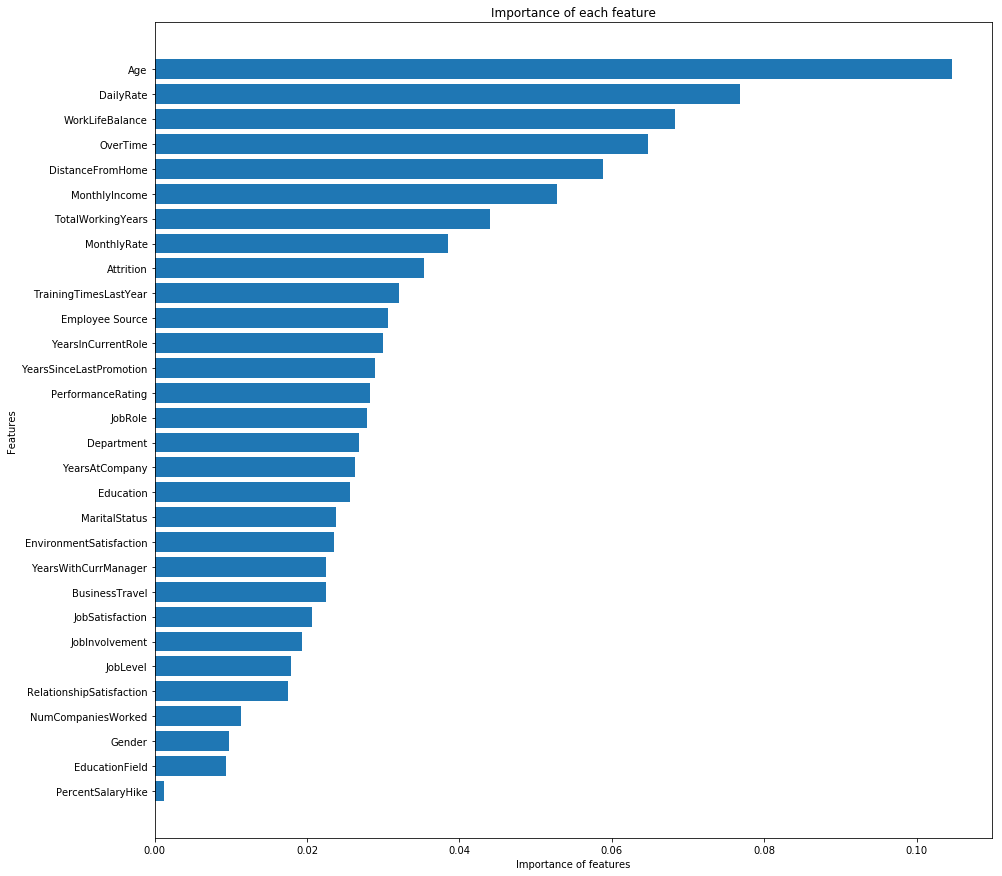

In [70]:
plt.figure(figsize=(15,15))
plt.barh(range(len(names)), importances, align = 'center')
plt.yticks(range(len(names)), names)
plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()

In [71]:
# Make predictions using 10-K-Fold-CV
# https://mateuszgrzyb.pl/klasyfikacja-wnioskow-o-wydanie-karty-kredytowej/
# o walidacji krzyżowej , dlaczego warto używać


# Baseline:
print((data_copy.Attrition.value_counts()/(data_copy.shape[0]))*100)


# Accuracy
# Accuracy jako główna miara jakości modelu i współczynnik zmienności jako miara jego stabilności.

scores = cross_val_score(rf, data_copy.drop(['Attrition'],axis=1), data_copy.Attrition, cv=10, scoring='accuracy')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

print('Średnie Accuracy: ' + str(cv.mean().round(3)))
print('Stabilność: ' + str((cv.std()*100/cv.mean()).round(3)) + '%')


# # ROC
# scores = cross_val_score(rf, data_copy.drop(['Attrition'],axis=1), data_copy.Attrition, cv=10, scoring='roc_auc')
# print(scores)
# print("ROC_AUC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# print('Średnie Accuracy: ' + str(cv.mean().round(3)))
# print('Stabilność: ' + str((cv.std()*100/cv.mean()).round(3)) + '%')

1   83.861
0   16.139
Name: Attrition, dtype: float64
[0.8415629  0.8471447  0.84113353 0.8471447  0.83769858 0.84285101
 0.84800343 0.84621993 0.84916201 0.85345939]
Accuracy: 0.85 (+/- 0.01)


NameError: name 'cv' is not defined

In [72]:
# metoda 2
# klasteryzacja

data_mod2 = data_copy[['Attrition', 'Age', 'JobLevel', 'OverTime', 'Department', 'TotalWorkingYears']].copy()
data_mod2.head()

,Attrition,Age,JobLevel,OverTime,Department,TotalWorkingYears
0,0,41.000,2.000,1,0,8.000
1,0,37.000,2.000,1,1,8.000
2,0,41.000,2.000,1,0,8.000
3,0,37.000,2.000,1,1,8.000
4,0,37.000,2.000,1,1,8.000


In [73]:
from sklearn.cluster import KMeans

In [74]:
kmeansdata = data_mod2[:].copy()
kmeans = KMeans(n_clusters=2, random_state=0).fit(kmeansdata)
labels = kmeans.labels_

In [75]:
kmeansdata['clusters'] = labels
kmeansdata

,Attrition,Age,JobLevel,OverTime,Department,TotalWorkingYears,clusters
0,0,41.000,2.000,1,0,8.000,1
1,0,37.000,2.000,1,1,8.000,1
2,0,41.000,2.000,1,0,8.000,1
3,0,37.000,2.000,1,1,8.000,1
4,0,37.000,2.000,1,1,8.000,1
5,0,37.000,2.000,1,1,8.000,1
6,0,41.000,2.000,1,0,8.000,1
7,0,41.000,2.000,1,0,8.000,1
8,0,41.000,2.000,1,0,8.000,1
9,0,41.000,4.000,1,0,21.000,0


In [76]:
print(kmeansdata[kmeansdata.columns].groupby(['clusters']).mean())

          Attrition    Age  JobLevel  OverTime  Department  TotalWorkingYears
clusters                                                                     
0             0.893 46.576     2.599     0.304       1.371             16.112
1             0.809 31.581     1.771     0.272       1.335              8.612


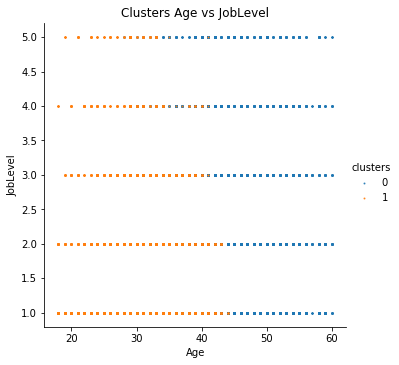

In [99]:
plt.rcParams['figure.figsize']=(15,10)
sns.lmplot('Age', 'JobLevel', 
           data=kmeansdata, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", "s": 1})
plt.title('Clusters Age vs JobLevel')
plt.xlabel('Age')
plt.ylabel('JobLevel')
plt.show()

In [78]:
# metoda 3
# klasteryzacja aglomeracyjna

from sklearn.cluster import AgglomerativeClustering

In [103]:
data_mod3 = data_copy[['Attrition', 'Age', 'JobLevel', 'OverTime', 'Department', 'TotalWorkingYears']].copy()
agglomerative = AgglomerativeClustering(n_clusters=2, affinity='euclidean').fit(data_mod3)

In [104]:
agglomerative

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

In [105]:
labels = agglomerative.labels_

In [106]:
data_mod3['clusters'] = labels
print(data_mod3[data_mod3.columns].groupby(['clusters']).mean())

          Attrition    Age  JobLevel  OverTime  Department  TotalWorkingYears
clusters                                                                     
0             0.876 44.916     2.685     0.302       1.356             16.493
1             0.815 31.959     1.683     0.272       1.343              8.054


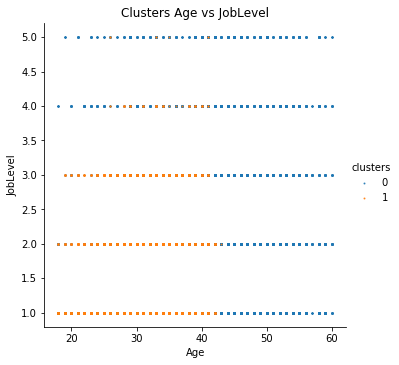

In [107]:
plt.rcParams['figure.figsize']=(10,10)
sns.lmplot('Age', 'JobLevel', 
           data=data_mod3, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", "s": 1})
plt.title('Clusters Age vs JobLevel')
plt.xlabel('Age')
plt.ylabel('JobLevel')
plt.show()